# 分类与预测——决策树
**内容提要**
1. **决策树的基本思想**
    - **三类信息混杂度的指标**
2. **建立决策树**
    - **分裂属性及其条件的选择**
    - **何时结束分裂**
    - **树的选择**
3. **产生分类规则并应用**
4. **示例**

  
  
  
  
  
  

上一次我们讨论了Logistic回归方法用于分类。今天我们讨论另一种用于分类的方法——决策树。  

决策树顾名思义，是一棵二叉或多叉树结构。它的每个内部节点代表一个属性，该节点的分支表示根据该属性的不同测试条件的输出。而每个叶子节点表示一个类标。如下面的图所示：




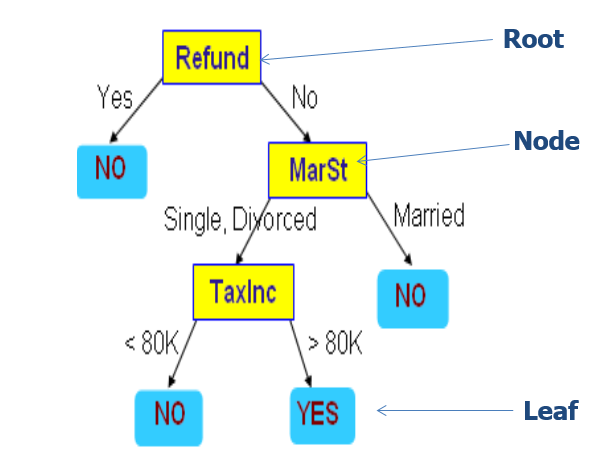

In [1]:
from IPython.display import Image
Image(filename='2.png',width = 500, height = 400)

# 1.决策树的基本思想

决策树的基本思想是将数据集根据某种测试条件分为2个或多个子集，使分裂后的子集在目标变量上具有更纯的分类。

这里我们就要介绍纯度和混杂度的概念

# 1.1 纯度和混杂度

常用的混杂度度量指标有  
- 信息熵  
- 基尼指数 
- 分类误差  

# 信息熵  
令Pi是数据集合中类别j的相对比例，那么，信息熵的定义为：$$entropy=\sum_{i=1}(-{p_i}log_{2}p_i)$$
那么，什么情况下，熵最小，什么情况下，熵最大呢？  
假如分为两类，那么当全部为某一类的时候信息的混杂度最小，即当Pi分别为0和1时熵最小，而两类各占一半的时候，信息的混杂度最大，即当Pi分别为0.5和0.5的时候熵最大。这个也很容易直观理解。  

我们考虑一个银行贷款案例数据集的熵，


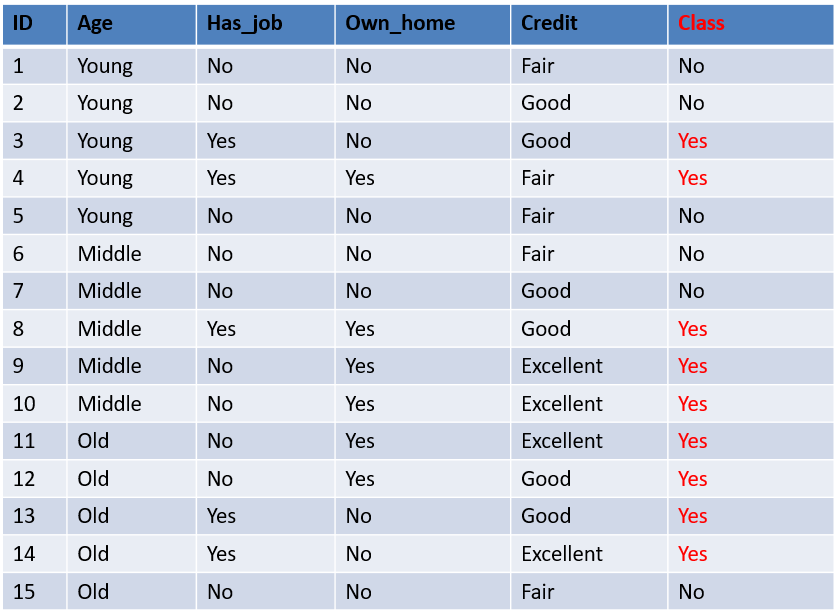

In [2]:
Image(filename='3.png',width = 500, height = 400)

银行贷款案例数据集的熵：$$Entropy(T)=−6/15*log_2(6/15) − 9/15*log_2(9/15)=0.971$$  

# 基尼指数 
同样，设Pj是数据集合中类别j的相对比例.定义$$gini(T)=1-\sum_{j=1}^{n}p_j^2$$  

同样，当目标变量为二元变量的时候，gini最大=1-1/2，最小为0.  

考虑刚才那个数据，银行贷款案例数据集的基尼指数为：  
gini=1-(6/15)2-(9/15)2=0.48

# 分类误差（classification error)

分类误差的定义为$$Classification error(t)=1-\max_{i}[p(i|t)]$$

银行贷款案例数据集的分类误差：  
CE=1- 9/15=6/15=0.4



下面我们就介绍怎么样建立决策树，使分裂后的子集在目标变量上具有“更纯的分类”。  

# 2.建立决策树  

常用算法有
- ID3-ID5,C4,C4.5,C5.0——二叉树或多叉树，利用信息熵
- CART（Classification and Regression Trees分类与回归树) （C&RT）——二叉树，利用GINI指数
- CHAID(chi-squared automatic interaction detection，卡方自动交互检测)——二叉数或多叉树  

其中，  
ID3：只能处理类别输入变量；裂分标准选用信息增益；  
C4.5:可处理类别和区间输入变量，裂分标准选择信息增益率。  
C5.0适用于大数据集，但目标只能是分类变量；  
CART为二叉算法：如果目标是分类变量则为分类树，若目标变量是区间变量（数值interval变量)，则为回归树；  
CHAID目标变量可以是区间或分类变量，主要特征是多向分叉，前向修剪，其标准如名所示，就是卡方检测。

建立决策树有两个主要问题：  
- 树的生长
    - 分裂属性及其条件的选择		     
    - 何时结束分裂
- 树的选择  

# 2.1 裂分目标与属性选择

# 裂变目标

   使分裂后数据子集的纯度比裂分前数据集的纯度最大限度的提高；也就是说，不同类别的观测尽量分散在不同的子集中。度量纯度就用到了我们上一节介绍到的信息混杂度的三类指标。 

# 属性选择
属性选择要利用到**信息增益**  

首先考虑信息增益： 
信息增益 = 裂分前数据集的熵 – 裂分后各子数据集的熵加权和  

其中：权重为每个子集中的观测数在裂分前总观测数中所占的比例

以以下这个案例进行说明



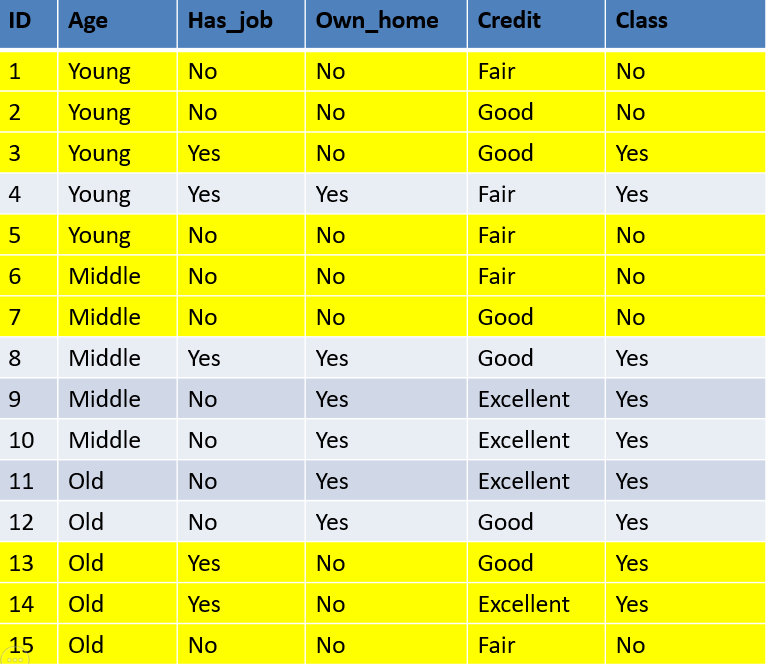

In [3]:
Image(filename='4.png',width = 500, height = 400)

这个数据集总共有15个观测值，在裂分前，有6个观测值类别为No, 9个观测值类比为Yes，所以，裂分前的信息熵为Entropy(T0)=−6/15*log2(6/15) − 9/15*log2(9/15)=0.971


我们首先基于**own_home**属性划分  

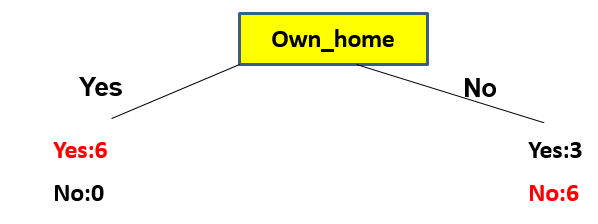

In [4]:
Image(filename='5.png',width = 500, height = 400)

划分后数据集的熵EntropyOwn_home(T)=   
6/15* Entropy(T1)+ 9/15* Entropy(T2)
= 6/15*(− 6/6*log2(6/6)  − 0/0*log2(0/6) )+
   9/15*(− 3/9*log2(3/9)  − 6/9*log2(6/9) =0.551

因此，信息增益Gain(ownhome)=0.971-0.551=0.42


数据集基于**age**属性划分：

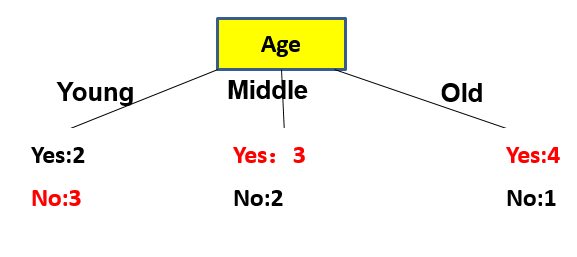

In [5]:
Image(filename='6.png',width = 500, height = 400)

裂分后数据集的熵EntropyAge(T)= 
5/15* Entropy(T1)+ 5/15* Entropy(T2)+ 5/15* Entropy(T3)
= 5/15*(− 3/5*log2(3/5)  − 2/5*log2(2/5) )+
   5/15*(− 3/5*log2(3/5)  − 2/5*log2(2/5) )+
   5/15*(− 1/5*log2(1/5)  − 4/5*log2(4/5) )=0.888

信息增益Gain(age)=0.971-0.888=0.083


同样地，根据**hasjob** 和**credit**划分后的熵分别为
EntropyHas_job(T)= 0.647        
 EntropyCredit(T)=0.608

信息增益分别为：
Gain(hasjob)=0.324
 Gain(credit)=0.363
Gain(ownhome)=0.42
Gain(age)=0.971-0.888=0.083  

比较四个变量的信息增益，我们发现own_home的信息增益最大，因此，选择own_home作为第一个节点。

**至此，我们就完成了第一个属性的选择。把测试属性取值相同的样本划为同一个子样本集；若子样本集的类别属性只含有单个属性，则分支为叶子节点。比如，own_home取值为Yes的Class全都为Yes，那么这就是一个叶子节点（不需要再裂分了）。否则的话，就继续对子样本集进行我们上述的操作。**

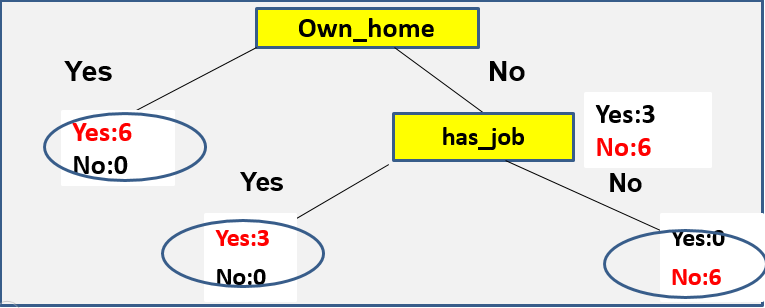

In [6]:
Image(filename='7.png',width = 500, height = 400)

但是，信息增益方法有一个很大的问题，就是它偏向于选择具有大量取值的属性，比如说我们这个数据集，ID这个属性具有唯一取值，它的信息增益就非常大，但是将它作为属性划分显然是不合理的。  

为了避免这种情况，我们考虑另一个指标：信息增益率。 

假设按照属性S来划分T，设S有m个值，根据该属性的取值将数据集T划分成m个子集{T1，T2，…Tm}，设Tj的数据个数是tj。信息增益率可以通过如下公式计算得到：$$GainRatio=\frac{Gain(S)}{SplitI_s(T)}$$其中，Gain(S)即信息增益，如前面所定义。而SplitIs(T)的定义为：$$SplitI_s(T)=-\sum_{j=1}^{m}{\frac{t_j}{t}}log_2{(\frac{t_j}{t})}$$  

我们注意到，上文所说的信息熵的定义为：$$entropy=\sum_{i=1}(-{p_i}log_{2}p_i)$$  

看到这里我们明白了，其实Spliti就是将每个划分看作一类（有一个对应的p（vi）)，然后计算熵。


比如刚才的例子中，计算基于own_home属性划分的信息增益率：  
- 信息增益Gain(ownhome)=0.971-0.551=0.42  
- SPLITI(ownhome)=-6/15*log2(6/15)  − 9/15*log2(9/15)=0.971  
- 则信息增益率GR(ownhome)=0.42/0.971=0.433
 
另外的度量纯度（纯度和信息混杂度其实是一个硬币的两面）提高的方法还有**GINI指数的下降**等等，其思路跟利用**信息增益/信息增益率**是一样的，只不过用的是不同的信息混杂度指标而已。



# 总结而言，决策树算法的具体实现步骤为：
1. 对当前样本集合，计算所有属性的信息增益；
2. 选择信息增益最大的属性作为测试属性，把测试属性取值相同的样本划为同一个子
样本集；
3. 若子样本集的类别属性只含有单个属性，则分支为叶子节点，判断其属性值并标上相应的符号，然后返回调用处；否则对子样本集递归调用本算法。

# 注意：  
- 对取值范围比较大的类别属性，可考虑分组泛化
- 对有序类别属性，划分不能改变其顺序性
- 对数值型属性，理论上需要测试各种可能的划分条件，实际上可以进行优化测试。也可以进行离散化处理。


# 2.2何时结束裂分？ 

满足下面的条件时，我们可以停止裂分：  

- 每个叶子节点都属于同一个类别。    

这种情况下，有可能得到一个非常大的树，某些叶子节点只包含很少的观测。因此，下面这种情况也可以停止裂分。
- 节点包含的观测个数小于某个指定值；
- 裂分的目标指标（例如：信息增益、信息增益率）非常小；
- 树的深度达到了预先指定的最大值。


# 2.3 树的选择  

我们该如何选择决策树呢？  

分类模型的优劣一般情况下可根据分类的准确度（或分类误差）来判断。
- 训练误差：在训练集上的误差
- 泛化误差：在非训练集上的期望误差

在验证数据集上的预测误差是泛化误差的无偏估计。

# 过拟合

- 好的分类模型：
    - 低训练误差  
    - 低泛化误差
- 拟合不足：
    - 较高训练误差
    - 较高泛化误差
- 过拟合：
    - 低训练误差
    - 较高泛化误差

下图中绿色的线就是过拟合的例子

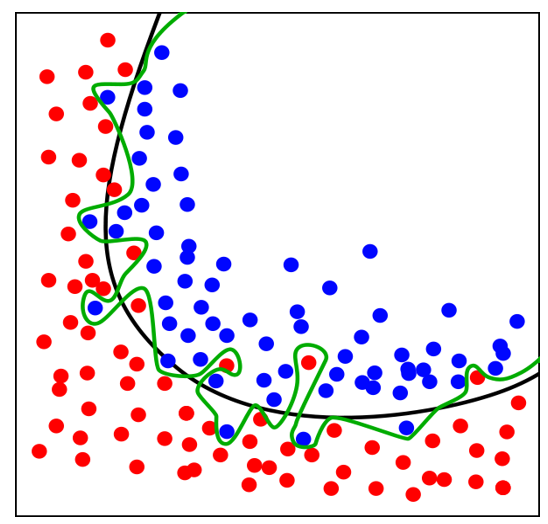

In [7]:
Image(filename='8.png',width = 300)

为了避免过拟合，我们可以进行“剪枝”处理  

# 剪枝

所谓“剪枝”给树剪枝就是剪掉“弱枝”（指的是在验证数据上误分类率高的树枝）。为树剪枝会增加训练数据上的错误分类率，但精简的树会提高新数据上的预测能力。

剪枝有两种方法：  
- 预剪枝（提前终止裂分）  
在树没有完全扩张之前就停止树的生长，即不要求每个叶子节点内的每一个属性值都相同，或者属于同一类别。
- 后剪枝  
    - 用新的叶子节点（类标号为多数类）代替子树；
    - 用子树中最常用的分枝代替子树；

# 3.产生分类规则并应用 

建立决策树之后，我们要将决策树转换为分类规则，才能应用到新的数据集中。如何产生规则呢？  

对从根到叶节点的每一条路径创建一条规则：
     即沿着给定路径上的每个划分 用逻辑AND形成分类规则的IF部分，对应叶节点的类别形成THEN部分。
例如：
- R1：IF Own_home=yes THEN Class=yes
- R2：IF Own_home=No AND Has_job=Yes   
     THEN Class=Yes
- R3：IF Own_home=No AND Has_job=No   
     THEN Class=No


# 4. 示例——使用ID3决策树算法预测销量高低

In [8]:
#使用ID3决策树算法预测销量高低
import pandas as pd
#参数初始化
filename = 'data/sales_data.xls'
data = pd.read_excel(filename, index_col = u'序号') #导入数据

In [9]:
data

,天气,是否周末,是否有促销,销量
序号,,,,
1,坏,是,是,高
2,坏,是,是,高
3,坏,是,是,高
4,坏,否,是,高
5,坏,是,是,高
6,坏,否,是,高
7,坏,是,否,高
8,好,是,是,高
9,好,是,否,高


In [10]:
#数据是类别标签，要将它转换为数据
#用1来表示“好”“是”“高”这三个属性，用-1来表示“坏”“否”“低”
data[data == u'好'] = 1
data[data == u'是'] = 1
data[data == u'高'] = 1
data[data != 1] = -1

In [11]:
data.head()

,天气,是否周末,是否有促销,销量
序号,,,,
1,-1,1,1,1
2,-1,1,1,1
3,-1,1,1,1
4,-1,-1,1,1
5,-1,1,1,1


In [12]:
# 将目标变量和其他变量分开
x = data.iloc[:,:3].as_matrix().astype(int)
y = data.iloc[:,3].as_matrix().astype(int)

In [13]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy') #建立决策树模型，基于信息熵

In [14]:
md = dtc.fit(x, y) #训练模型
md

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

运行代码后，将会输出一个tree.dot的文本文件。  

为了进一步将它转换为可视化格式，需要安装Graphviz（跨平
台的、基于命令行的绘图工具）和pydotplus，然后在命令行中以如下方式编译。

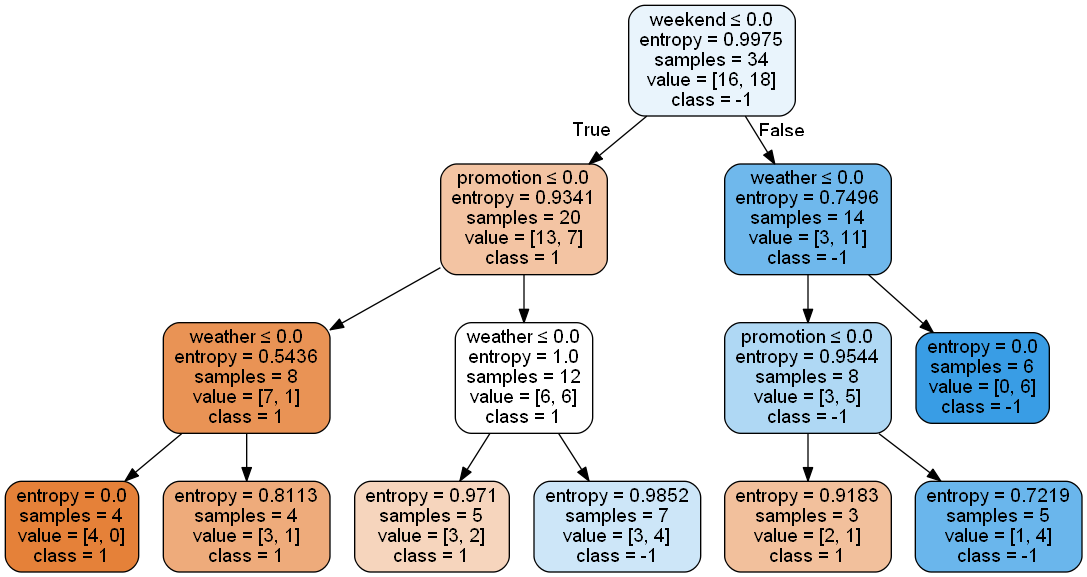

In [21]:
import pydotplus
from sklearn.tree import export_graphviz
dot_data = export_graphviz(md, out_file=None,
                         class_names=['1','-1'],
                         feature_names=['weather','weekend','promotion','sales'],#中文会显示不出来，为了减少麻烦，我们这里先使用英文
                         filled=True, rounded=True,
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# 保存图像到pdf文件
Image(graph.create_png(),width = 700)